In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

In [4]:
dataset=pd.read_csv("train.csv")

In [5]:
dataset


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [8]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
dataset["labels"]=dataset["class"].map({0:"Hate Speech",
                                        1:"Offensive language",
                                      2:"No hate or offensive language"})

In [10]:
dataset


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [11]:
data=dataset[["tweet","labels"]]

In [12]:
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [13]:
#Data Preprocessing
import re
import nltk
import string
nltk.download('stopwords')
#Import of stop words 
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))
#Import stemming
stemmer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pench\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Data cleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?://\S+|www\.S+','',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub("[%s]"%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    #Stopwords removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=' '.join(text)
    #Stemming the text
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=' '.join(text)
    return text

In [15]:
data.loc[:, "tweet"] = data["tweet"].apply(clean_data)
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [16]:
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv_obj=CountVectorizer()
X=cv_obj.fit_transform(X)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 197861 stored elements and shape (24783, 25693)>

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [21]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 132619 stored elements and shape (16604, 25693)>

In [49]:
#Building the ML model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
#Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 154,   34,  277],
       [  31, 1127,  221],
       [ 230,  222, 5883]])

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(cm, annot = True,fmt=".1f",cmap="YlGnBu")


<Axes: >

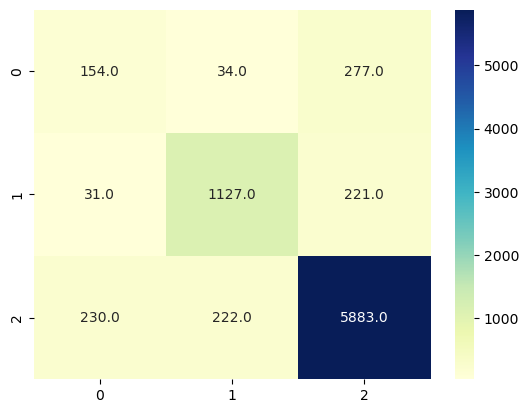

In [51]:
plt.show()

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8759016994742633

In [85]:
sample = "People protesting against the government are a danger to the nation so we should kill them"
sample=clean_data(sample)
sample

'peopl protest govern danger nation kill'

In [86]:
data1=cv_obj.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [87]:
dtc.predict(data1)

array(['Hate Speech'], dtype=object)